In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [20]:
df = pd.read_csv("C:/Users/victus/Documents/data.project/week-6/FuelConsumption.csv")

In [21]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [22]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

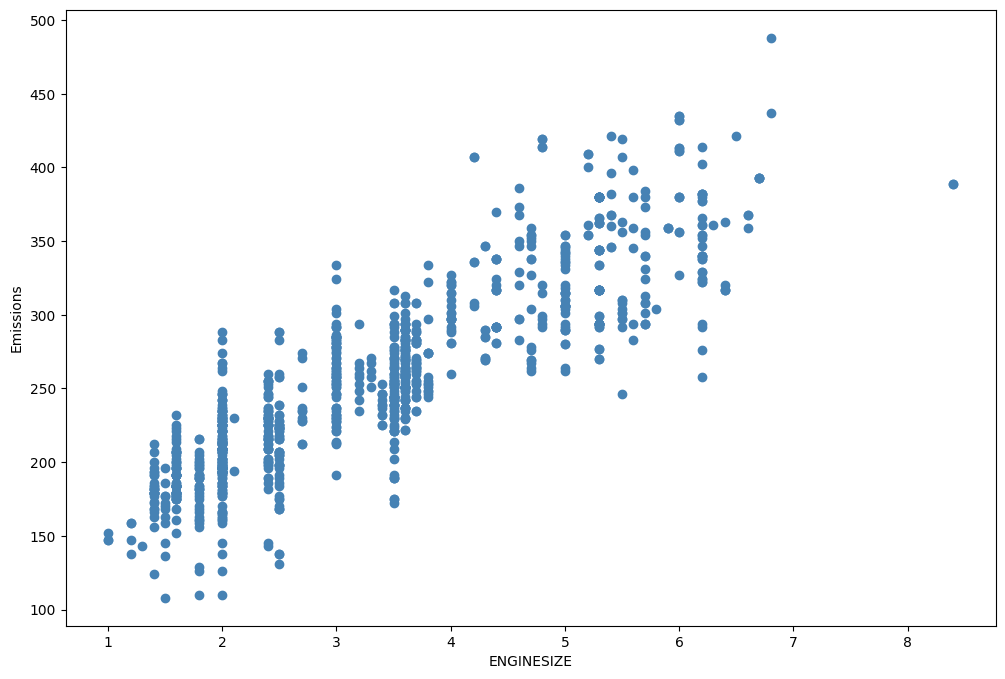

In [23]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [25]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.

2nd degree: y = θ0 + θ1 x + θ2 x^2

For example, the original feature set has only one feature: ENGINESIZE If we select the degree of the polynomial to be 2: It generates 3 features: degree=0, degree=1, degree=2

In [11]:
from sklearn.preprocessing import PolynomialFeatures

train_x = np.asanyarray(train[["ENGINESIZE"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

test_x = np.asanyarray(test[["ENGINESIZE"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])

poly = PolynomialFeatures(degree=2)

In [12]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    4.8  23.04]
 [ 1.    4.3  18.49]
 [ 1.    2.4   5.76]
 ...
 [ 1.    5.7  32.49]
 [ 1.    3.5  12.25]
 [ 1.    3.7  13.69]]


- Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation would be turn into: y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [26]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [27]:
train_y_ = clf.fit(train_x_poly, train_y)

# The coefficients
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)

Coefficients: [[ 0.         50.95235676 -1.5475106 ]]
Intercept: [106.41761443]


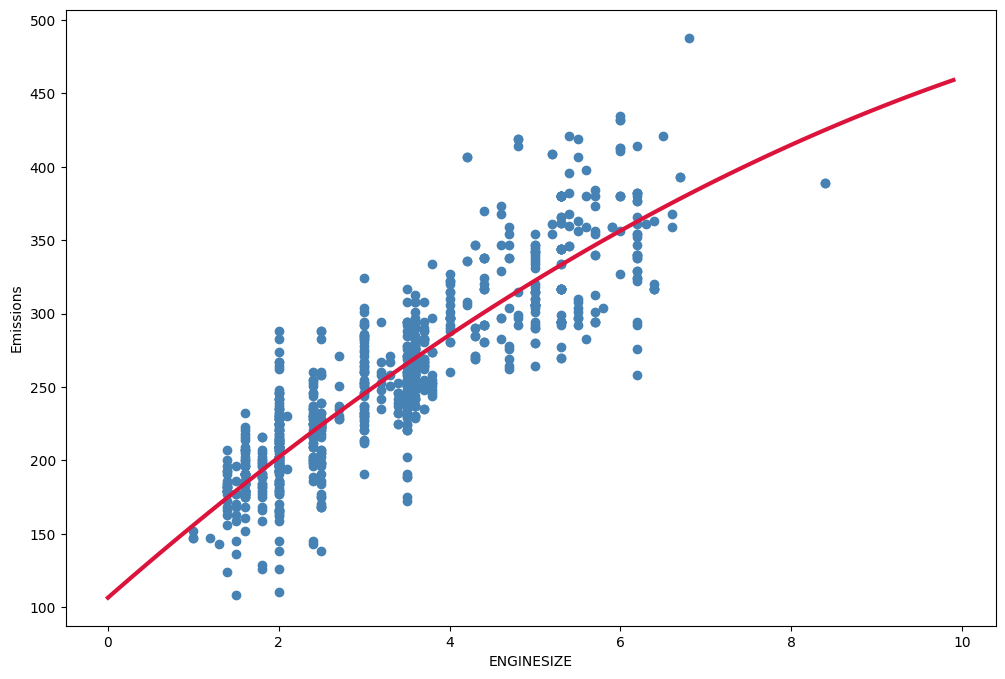

In [28]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color="steelblue")
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX, 2)
plt.plot(XX, yy, "crimson", linewidth=3)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [29]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[106.41761443 111.497375   116.54618535 121.5640455  126.55095543
 131.50691516 136.43192467 141.32598397 146.18909305 151.02125193
 155.82246059 160.59271904 165.33202728 170.0403853  174.71779312
 179.36425072 183.97975811 188.56431529 193.11792226 197.64057901
 202.13228555 206.59304188 211.022848   215.42170391 219.7896096
 224.12656509 228.43257036 232.70762542 236.95173026 241.1648849
 245.34708932 249.49834353 253.61864753 257.70800132 261.76640489
 265.79385825 269.7903614  273.75591434 277.69051707 281.59416958
 285.46687189 289.30862398 293.11942586 296.89927752 300.64817898
 

# Evaluation

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_true = train['CO2EMISSIONS']
y_pred = clf.predict(train[['ENGINESIZE', 'CO2EMISSIONS', 'ENGINESIZE^2']])

r2 = r2_score(y_true, y_pred)

mae = mean_absolute_error(y_true, y_pred)

mse = mean_squared_error(y_true, y_pred)

rmse = np.sqrt(mse)

print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

R² Score: -44218.092733388396
MAE: 12931.331539653396
MSE: 177124488.38943842
RMSE: 13308.81243347574


c:\Users\victus\Documents\data.project\.conda\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Practice
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [68]:
X = train[['ENGINESIZE']]
y_true = train['CO2EMISSIONS']
degree = 3

In [69]:
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_true)

LinearRegression()

In [70]:
y_pred_poly = poly_reg.predict(X_poly)

r2_poly = r2_score(y_true, y_pred_poly)
mae_poly = mean_absolute_error(y_true, y_pred_poly)
mse_poly = mean_squared_error(y_true, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

c:\Users\victus\Documents\data.project\.conda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


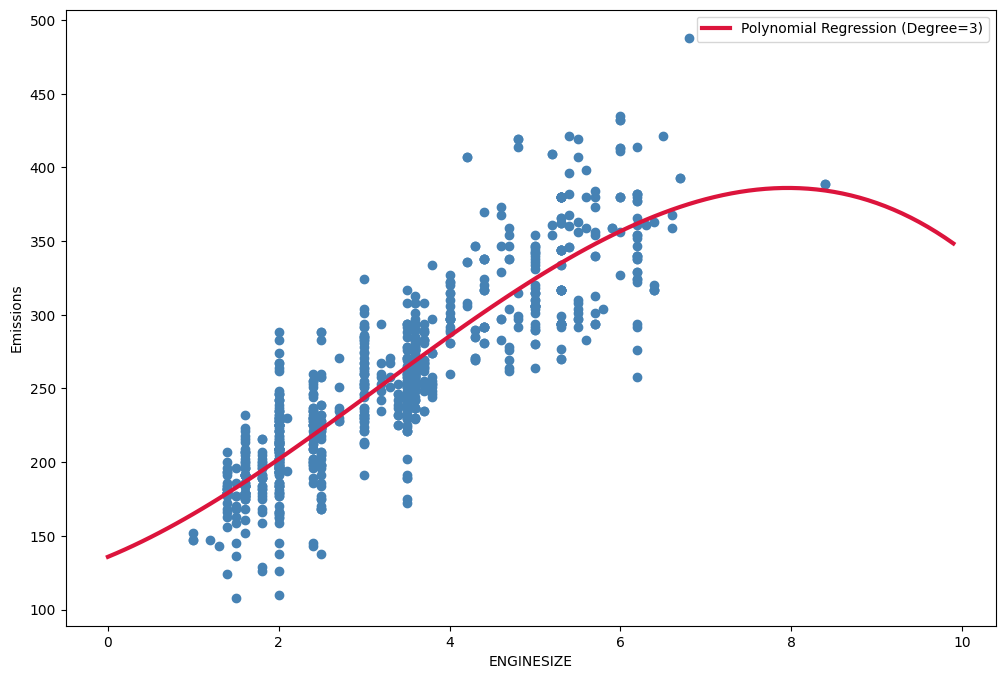

In [71]:
XX = np.arange(0.0, 10.0, 0.1)[:, np.newaxis]
yy = poly_reg.predict(poly.transform(XX))

plt.scatter(X, y_true, color="steelblue")
plt.plot(XX, yy, "crimson", linewidth=3, label=f'Polynomial Regression (Degree={degree})')
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.legend()
plt.show()

In [72]:
print(XX)
print(yy)

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]
 [1.1]
 [1.2]
 [1.3]
 [1.4]
 [1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2. ]
 [2.1]
 [2.2]
 [2.3]
 [2.4]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3. ]
 [3.1]
 [3.2]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.7]
 [3.8]
 [3.9]
 [4. ]
 [4.1]
 [4.2]
 [4.3]
 [4.4]
 [4.5]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]
 [5.1]
 [5.2]
 [5.3]
 [5.4]
 [5.5]
 [5.6]
 [5.7]
 [5.8]
 [5.9]
 [6. ]
 [6.1]
 [6.2]
 [6.3]
 [6.4]
 [6.5]
 [6.6]
 [6.7]
 [6.8]
 [6.9]
 [7. ]
 [7.1]
 [7.2]
 [7.3]
 [7.4]
 [7.5]
 [7.6]
 [7.7]
 [7.8]
 [7.9]
 [8. ]
 [8.1]
 [8.2]
 [8.3]
 [8.4]
 [8.5]
 [8.6]
 [8.7]
 [8.8]
 [8.9]
 [9. ]
 [9.1]
 [9.2]
 [9.3]
 [9.4]
 [9.5]
 [9.6]
 [9.7]
 [9.8]
 [9.9]]
[135.74529363 138.19442964 140.75664626 143.428256   146.20557136
 149.08490483 152.06256892 155.13487612 158.29813893 161.54866984
 164.88278137 168.29678599 171.78699623 175.34972456 178.98128349
 182.67798553 186.43614315 190.25206888 194.1220752  198.04247461
 202.0095796  206.01970269 210.0691